In [1]:
# Import Stuff
import time

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data as data

%matplotlib inline
from IPython.display import set_matplotlib_formats
from matplotlib.colors import to_rgba
from tqdm.notebook import tqdm  

set_matplotlib_formats("svg", "pdf")

G:\Temp\ipykernel_24336\1404951126.py:15: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("svg", "pdf")


In [2]:
print('Torch Version: ', torch.__version__)

Torch Version:  1.11.0+cu113


In [3]:
# Set a Seed to get exact same Random Numbers
torch.manual_seed(42) 

In [4]:
# Initialize a Tensor
x = torch.Tensor(2, 3, 4)
x

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

There are many functionalities to initialize a particular set of values in a `Tensor`

1. `torch.zeros`: Creates a tensor filled with zeros
2. `torch.ones`: Creates a tensor filled with ones
3. `torch.rand`: Creates a tensor with random values uniformly sampled between 0 and 1
4. `torch.randn`: Creates a tensor with random values sampled from a normal distribution with mean 0 and variance 1
5. `torch.arange`: Creates a tensor containing the values N,N+1,N+2,...,M
6. `torch.Tensor` (input list): Creates a tensor from the list elements you provide

In [5]:
# Create Tensor with random values from 0 to 1 with [2, 3, 4] shape
x = torch.rand(2, 3, 4)
x

tensor([[[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411, 0.4294],
         [0.8854, 0.5739, 0.2666, 0.6274],
         [0.2696, 0.4414, 0.2969, 0.8317]]])

In [6]:
# Shape
x.shape

torch.Size([2, 3, 4])

In [7]:
# Size 
x.size()

torch.Size([2, 3, 4])

In [8]:
# Dimensions
dim1, dim2, dim3 = x.size()
print(dim1, dim2, dim3)

2 3 4


`Tensor` can be converted to `np.array` and vice versa. For this, we use `torch.from_numpy`

In [9]:
np_arr = np.array([[1, 2], [3, 4]], dtype=np.int)
tensor = torch.from_numpy(np_arr)

print('NumPy Array: ', np_arr)
print('\nPyTorch Tensor: ', tensor)

NumPy Array:  [[1 2]
 [3 4]]

PyTorch Tensor:  tensor([[1, 2],
        [3, 4]], dtype=torch.int32)


G:\Temp\ipykernel_24336\2670867121.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np_arr = np.array([[1, 2], [3, 4]], dtype=np.int)


In [10]:
# Vice Versa
tensor = torch.arange(4)
np_arr = tensor.numpy()

print("PyTorch tensor:", tensor)
print("Numpy array:", np_arr)

PyTorch tensor: tensor([0, 1, 2, 3])
Numpy array: [0 1 2 3]


In case, your `Tensor` is on `GPU` device then, you need to call `.cpu()` on that tensor before hand

```python
np_arr = tensor.cpu().numpy()
```

Now, there are many operations which can be performed on `Tensor`.

In [11]:
# Add
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[0.1053, 0.2695, 0.3588],
        [0.1994, 0.5472, 0.0062]])
X2 tensor([[0.9516, 0.0753, 0.8860],
        [0.5832, 0.3376, 0.8090]])
Y tensor([[1.0569, 0.3448, 1.2448],
        [0.7826, 0.8848, 0.8151]])


In [12]:
# PyTorch Add
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
print("X1 (before)", x1)
print("X2 (before)", x2)

x2.add_(x1)
print("X1 (after)", x1)
print("X2 (after)", x2)

X1 (before) tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
X2 (before) tensor([[0.7104, 0.9464, 0.7890],
        [0.2814, 0.7886, 0.5895]])
X1 (after) tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
X2 (after) tensor([[1.2884, 1.8504, 1.3437],
        [0.6237, 1.4230, 0.9539]])


In [13]:
# Change view of the Tensor
x = torch.arange(6)
print('X', x)

x = x.view(2, 3)
print('New X', x)

X tensor([0, 1, 2, 3, 4, 5])
New X tensor([[0, 1, 2],
        [3, 4, 5]])


In [14]:
# Swap Dimension 0 and 1
x = x.permute(1, 0)
x

tensor([[0, 3],
        [1, 4],
        [2, 5]])

There are other operations for Matrices.
1. `torch.matmul`: Dot Product over 2 Tensors. `a@b`

2. `torch.mm`: Matrix Product over 2 Matrices but doesn't support `broadcasting`.

3. `torch.bmm`: Perfoms Matrix Product with a support `Batch Dimension`

4. `torch.einsum`: Performs sum of Products using `Einstein Summation Convention`.

In [15]:
x = torch.arange(6)
x = x.view(2, 3)
x

tensor([[0, 1, 2],
        [3, 4, 5]])

In [16]:
W = torch.arange(9).view(3, 3)
W

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [17]:
h = torch.matmul(x, W)
h

tensor([[15, 18, 21],
        [42, 54, 66]])

### Dynamic Computation Graph and Backpropagation

In Pytorch, we can automatically get the `gradient/derivatives` of functions we define. If our model would output a single `scaler` value then we would talk about taking a `derivative` but in case of <b>multiple</b> output variable we go for `gradients`.

Given an input `{x}`, we define our function by manipulating that input, usually by matrix-multiplications with `weight` matrices and additions with so-called `bias` vectors. As we manipulate the input, we are creating a `computational graph`. This shows how to arrive at our output from our input.

We create a `Dynamic Computational Graph` as PyTorch keeps track of the manipulations we make.

We need `gradients` because when we define a Neural Net to compute an output `y` for an input `x`. We use `error measure` which tells us how bad it is predicting output `y` from input `x`. So, we use these `gradients` to update the weights `W`.

In [18]:
# We specify which Tensors require gradients.
x = torch.ones((3,))
print(x.requires_grad)

False


In [19]:
# Change its requirement to True
x.requires_grad_(True)
print(x.requires_grad)

True


In this, we will use this function below.
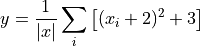

Now, we have `x` as our parameters and we want to `optimize` the output `y`. So, we want to obtain the gradients `dy/dx`.

In [20]:
# Only Float Tensors can have Gradients
x = torch.arange(3, dtype=torch.float32, requires_grad=True) 

x

tensor([0., 1., 2.], requires_grad=True)

In [21]:
# Build the Computational Graph 
a = x + 2
b = a ** 2
c = b + 3

y = c.mean()
y

tensor(12.6667, grad_fn=<MeanBackward0>)

Each node of the `Computational Graph` has automatically defined a function for calculating gradients w.r.t inputs. `grad_fn`. 

Now, we can perform `backpropogation` on the computational graph by using `backward()` on the last output, which calculates the `gradients` for each tensor that has `requires_grad=True` property.

In [22]:
y.grad_fn

In [23]:
# Backpropogation
y.backward()

In [24]:
# x.grad will contain gradient dy/dx
x.grad

tensor([1.3333, 2.0000, 2.6667])

### GPU Support 

With `GPU` Support, thousands of operations can be performed in parallel. You can check if your computer has Pytorch with `CUDA` support enabled or not.

If not, and if on colab then just change the runtime type to `GPU`.

In [25]:
torch.cuda.is_available()

True

By default, all tensors are created on CPU, so we need to push the tensor onto a `GPO` using `.to(...)` or `.cuda()`. We can also define the `device` then perform same things.

In [26]:
device = torch.device('cuda') if torch.cuda.is_available() else 'cpu'
device

device(type='cuda')

In [27]:
x = torch.zeros(2, 3)
x = x.to(device) # Transfer to GPU

x

tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')

Compare the Performance of `GPU` and `CPU` by multiplying two matrices.

In [28]:
x = torch.randn(5000, 5000)

# CPU
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f'CPU Time: {(end_time - start_time):6.5f}s')


# GPU
if torch.cuda.is_available():
    x = x.to(device)
    # CUDA is asynchronous, so we need to use different timing functions
    start = torch.cuda.Event(enable_timing=True)
    end = torch.cuda.Event(enable_timing=True)
    start.record()
    _ = torch.matmul(x, x)
    end.record()
    
    # Wait for everythin to finish running on GPU
    torch.cuda.synchronize()
    print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")

CPU Time: 1.11694s
GPU time: 7.57497s


In [29]:
# When running on GPU you need to set seeds
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)
    
# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.determinstic = True
torch.backends.cudnn.benchmark = False

## Example
We will use `Continous XOR` as the Example. 
Given two binary inputs `x1` and `x2`, the label to predict is `1` if  either `x1` or `x2` is 1 while the other is 0, or the label is 0 in all other cases. 

Desired Seperation of an `XOR` dataset would be
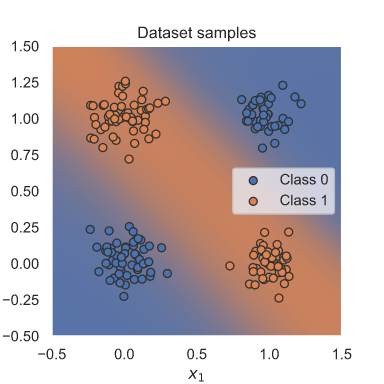

Create a `SimpleClassifier` with this architecture.
<img src="https://uvadlc-notebooks.readthedocs.io/en/latest/_images/small_neural_network.svg"/>


In [30]:
import torch.nn as nn


class Classifier(nn.Module):
    def __init__(self, n_inputs, n_hidden, n_outputs):
        super().__init__()
        # Add the modules here.
        self.linear1 = nn.Linear(n_inputs, n_hidden)
        self.activation = nn.Tanh()
        self.linear2 = nn.Linear(n_hidden, n_outputs)
        
    def forward(self, x):
        # Perform Forward Pass to determine Prediction
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        
        return x

In [31]:
# Build Model
model = Classifier(n_inputs=2, n_hidden=4, n_outputs=1)

model

Classifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (activation): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

Print all the submodules the model contains. The `parameters` of a module can be obtained by using `parameters()`, or `named_parameters()` to get a name of each parameter object.

In [32]:
for name, param in model.named_parameters():
    print(f'Parameter {name}, shape {param.shape}')

Parameter linear1.weight, shape torch.Size([4, 2])
Parameter linear1.bias, shape torch.Size([4])
Parameter linear2.weight, shape torch.Size([1, 4])
Parameter linear2.bias, shape torch.Size([1])


Each `linear` layer has a weight matrix with shape `[output, input]`, and a bias of shape `[output]`. 

The parameters are only registered for `nn.Module` objects. So, if you define a list of modules which are not registered it may cause an issue . For this there is `nn.ModuleList`, `nn.ModuleDict` and `nn.Sequential` which allows you to have different data structures of module.

### Data
PyTorch provides some functionality to load training and test data efficiently using `torch.utils.data`.

In this package there are two classes used for handling data: `data.Dataset` and `data.DataLoader`. The `Dataset` class provides a uniform interface to access the train/test data while `DataLoader` makes sure to efficiently load and stack the data points from the dataset into batches durint `training`.

#### `torch.utils.data.Dataset` class
For this XOR Example, we specify `__getitem` and `__len__` functions. 

In [33]:
from torch.utils.data import DataLoader, Dataset

class XORDataset(Dataset):
    def __init__(self, size, std=0.1):
        """
        Inputs:
            size - Number of data points
            std - Standard Deviation of the noise
        """
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continous_xor()
        
    def generate_continous_xor(self):
        # Each data point has 2 variables, x and y which could be 0 or 1
        # The label is their XOR Combination. 1 if only x or only y is 1 while the other is 0.
        # If x=y, label is 0.
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.long)
        
        # Add gaussian noise to the data points
        data += self.std * torch.randn(data.shape)
        
        self.data = data
        self.label = label
        
    def __len__(self):
        return self.size
    
    def __getitem__(self, idx):
        # Return idx-th data point of the dataset
        data_point = self.data[idx]
        data_label = self.label[idx]
        
        return data_point, data_label 

In [34]:
dataset = XORDataset(size=200)

print('Size of the dataset: ', len(dataset))
print('Data point 0', dataset[0])

Size of the dataset:  200
Data point 0 (tensor([0.9632, 0.1117]), tensor(1))


In [35]:
# Visualize Samples
def vis_samples(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

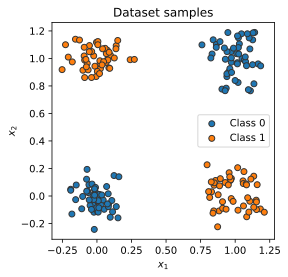

In [36]:
vis_samples(dataset.data, dataset.label)

#### `torch.utils.data.DataLoader` class

It represents a Python Iterable over a dataset with automatic loading, multi-process data loading support and many features for efficient data loading. The data loader communicates with the dataset using the function `__getitem__`, and stacks its outputs as tensors over the first dimension to form a batch.

We can configure a dataloader using input args.

1. `batch_size`: Number of samples to stack per batch
2. `shuffle`: If true, data is returned in a random order.
3. `num_workers`: Number of subprocesses to use for data loading.
4. `pin_memory`: If True, data will copy Tensors into `CUDA` pinned memory before returning them.
5. `drop_last`: The last batch is dropped in case it is smaller than the specified batch size.

In [37]:
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

In [38]:
# next(iter(...)) catches the first batch of the data loader
# If shuffle is True, this will return a different batch every time we run this cell
data_inputs, data_labels = next(iter(dataloader))


# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the
# dimensions of the data point returned from the dataset class
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([8, 2]) 
 tensor([[-0.0890,  0.8608],
        [ 1.0905, -0.0128],
        [ 0.7967,  0.2268],
        [-0.0688,  0.0371],
        [ 0.8732, -0.2240],
        [-0.0559, -0.0282],
        [ 0.9277,  0.0978],
        [ 1.0150,  0.9689]])
Data labels torch.Size([8]) 
 tensor([1, 1, 1, 0, 1, 0, 1, 0])


### Optimization

During `Optimization`, following steps are performed
1. Get a batch from dataloader
2. Obtain predictions from the model for the batch
3. Calculate the loss based on the difference b/w predictions and labels
4. Backpropagation for calculating gradients for every parameter w.r.t loss.
5. Update the parameters of the model in the direction of the gradients.

### Loss Modules
We can calculate the loss for a batch by simply performing a few tensor operations as those are automatically added to the computation graph. For instance, for binary classification, we can use `Binary Cross Entropy (BCE)` which is defined as follows:

$$\mathcal{L}_{BCE} = -\sum_i \left[ y_i \log x_i + (1 - y_i) \log (1 - x_i) \right]$$

where `y` are our labels and `x` our predictions both in range [0,1]. PyTorch also provides a list of predefined loss functions. Pytorch has two modules `nn.BCELoss()` and `nn.BCEWithLogitsLoss()`. `BCELoss` expects the inputs `x` to be in range [0, 1] i.e output of `sigmoid`. `nn.BCEWithLogitsLoss()` combines sigmoid layer and the BCELoss in a single class.

In [39]:
loss = nn.BCEWithLogitsLoss()

### Stochastic Gradient Descent
For optimizers, PyTorch has `torch.optim`. The simplest optimizer `torch.optim.SGD` updates the parameters by multiplying the gradients with a small constant called `learning rate` and subtracting those from the parameters which minimizes the `loss`. Choose the learning rate is important. Default value is `0.1`.

In [40]:
optim = torch.optim.SGD(model.parameters(), lr=0.1)

The optimizer uses two functions, `optimizer.step()` and `optimizer.zero_grad()`. The step function updates the parameters based on the gradients. The `zero_grad()` function sets the gradients of all parameters to `zero`. 

While this function seems less relevant at first, it is a crucial pre-step before performing backpropagation. If we would call the `backward` function on the loss while the parameter gradients are non-zero from the previous batch, the new gradients would actually be added to the previous ones instead of overwriting them. This is done because a parameter might occur `multiple times` in a computation graph, and we need to sum the `gradients` in this case instead of replacing them.

### Training

In [41]:
# First create a Large Dataset
train_data = XORDataset(size=3000)
train_dataloader = DataLoader(train_data, batch_size=128, shuffle=True)

In [42]:
# Push the model to GPU.
model.to(device)

Classifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (activation): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

We set our model to training using `model.train()`. 

In [43]:
def train_model(model, optim, dataloader, loss, n_epochs=100):
    model.train()
    
    # Training Loop
    for epoch in tqdm(range(n_epochs)):
        for data_inputs, data_labels in dataloader:
            # Move Input Data to GPU
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)
            
            # Run model 
            pred = model(data_inputs)
            pred = pred.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]
            
            # Calculate Loss
            loss_ = loss(pred, data_labels.float())
            
            # Perform Backpropagation
            optim.zero_grad()
            loss_.backward()
            
            # Update Parameters
            optim.step()

In [44]:
train_model(model, optim, train_dataloader, loss)

  0%|          | 0/100 [00:00<?, ?it/s]

### Save Model

Save Weights of the trained model using `state_dict` from the model containing learnable parameters.

In [45]:
state_dict = model.state_dict()

state_dict

OrderedDict([('linear1.weight',
              tensor([[-2.6222, -3.4313],
                      [ 2.1661, -2.5797],
                      [-2.6968, -1.6053],
                      [-0.6506, -0.9876]], device='cuda:0')),
             ('linear1.bias',
              tensor([ 1.5264, -1.4933,  3.0426, -0.0666], device='cuda:0')),
             ('linear2.weight',
              tensor([[-4.6523,  3.4192,  4.6678, -0.3140]], device='cuda:0')),
             ('linear2.bias', tensor([-1.7114], device='cuda:0'))])

In [46]:
# Save Model
torch.save(state_dict, 'model.tar')

In [47]:
# Load saved model
state_dict = torch.load('model.tar')

# Create a new model and load the state 
new_model = Classifier(n_inputs=2, n_hidden=4, n_outputs=1)
new_model.load_state_dict(state_dict)

# Verify that the parameters are the same
print("Original model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())

Original model
 OrderedDict([('linear1.weight', tensor([[-2.6222, -3.4313],
        [ 2.1661, -2.5797],
        [-2.6968, -1.6053],
        [-0.6506, -0.9876]], device='cuda:0')), ('linear1.bias', tensor([ 1.5264, -1.4933,  3.0426, -0.0666], device='cuda:0')), ('linear2.weight', tensor([[-4.6523,  3.4192,  4.6678, -0.3140]], device='cuda:0')), ('linear2.bias', tensor([-1.7114], device='cuda:0'))])

Loaded model
 OrderedDict([('linear1.weight', tensor([[-2.6222, -3.4313],
        [ 2.1661, -2.5797],
        [-2.6968, -1.6053],
        [-0.6506, -0.9876]])), ('linear1.bias', tensor([ 1.5264, -1.4933,  3.0426, -0.0666])), ('linear2.weight', tensor([[-4.6523,  3.4192,  4.6678, -0.3140]])), ('linear2.bias', tensor([-1.7114]))])


### Evaluation

In [48]:
test_dataset = XORDataset(size=500)
# drop_last -> Don't drop the last batch although it is smaller than 128
test_dataloader = DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False)

For the metric, we will accuracy calculated as 
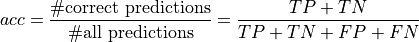

1. TP -> True Positives
2. TN -> True Negatives
3. FP -> False Positives
4. FN -> False Negatives

When evaluating the model, we don't need to keep track of the `computational graph` as don't need to calculate the gradients. So, to deactivate the computational graph we use `torch.no_grad()` but first set the model to eval mode  using `model.eval()`.

In [49]:
def eval_model(model, dataloader):
    model.eval()
    true_preds, num_preds = 0.0, 0.0
    
    with torch.no_grad():
        for data_inputs, data_labels in dataloader:
            # Determine predictions of model on dev test set
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds) # Map Predictions b/w 0 and 1
            
            pred_labels = (preds >= 0.5).long() # Binarize predictions to 0 and 1
            
            # Keep records of predictions for accuracy
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]
    
    acc = true_preds / num_preds
    print(f'Accuracy of the model: {100.0 * acc:4.2f}%')

In [50]:
eval_model(model, test_dataloader)

Accuracy of the model: 100.00%


#### Visualizing Classification Boundaries

To visualize what the model has learned, a prediction can be performed for every data point in the range of [-0.5, 1.5], and visualize the prediction class. This shows where the model has created `decision boundaries`, and which points would be classified as `0`, and which as `1`.

In [51]:
@torch.no_grad()
def visualize_classification(model, data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
        
    data_0 = data[label == 0]
    data_1 = data[label == 1]
    
    plt.figure(figsize=(4, 4))
    plt.scatter(data_0[:, 0], data_0[:, 1], edgecolor='#333', label="Class 0")
    plt.scatter(data_1[:, 0], data_1[:, 1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()
    
    model.to(device)
    c0 = torch.Tensor(to_rgba("C0")).to(device)
    c1 = torch.Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2)  # Meshgrid function as in numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    # Specifying "None" in a dimension creates a new one
    output_image = (1 - preds) * c0[None, None] + preds * c1[None, None]
    output_image = (
        output_image.cpu().numpy()
    )  # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin="lower", extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)

D:\Development\Python\Python3.10\lib\site-packages\torch\functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


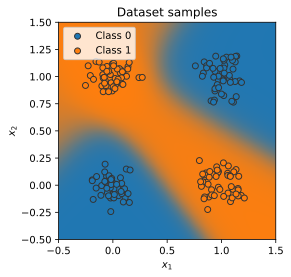

In [52]:
visualize_classification(model, dataset.data, dataset.label)
plt.show()